In [142]:
import numpy as np
from numpy.linalg import *
import time
from scipy.linalg import expm
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_session
init_session()

IPython console for SymPy 1.13.3 (Python 3.13.2-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



In [359]:

M1 = np.matrix([[2, 3, 4], [ 10 , 12 , 5], [7,7,7]])
M2 = np.matrix([[1, 2, 1], [ 1 , 5 , 1], [2,8,2]])
transpose = np.transpose(M1)


print(f'Matrix: {M1}')
print(f"Transpose: {transpose}")
print(f"Dot: {M1*M2}")
print(f"Det: {det(M1)}")
print(f"Inv: {inv(M1)}")
print(f"Diag: {np.diag([3,3],2)}")
print(f"Dimention: {M1.shape}")


Matrix: [[ 2  3  4]
 [10 12  5]
 [ 7  7  7]]
Transpose: [[ 2 10  7]
 [ 3 12  7]
 [ 4  5  7]]
Dot: [[ 13  51  13]
 [ 32 120  32]
 [ 28 105  28]]


TypeError: Input to Determinant, [[2, 3, 4], [10, 12, 5], [7, 7, 7]], not a matrix

Para resolver $Ax = b$, $x = A^{-1}b$

In [7]:
b = np.array([1, 2, 3])

start_time = time.time()
x = np.matmul(inv(M1), b)
end_time = time.time()
time1 = end_time - start_time
print(f"result: {x} \ntime: {end_time - start_time}")

start_time = time.time()
x = solve(M1, b)
end_time = time.time()
time2 = end_time - start_time
print(f"result: {x} \ntime: {end_time - start_time}")
print(f"speedup: {time1/time2}")

result: [[ 0.57142857 -0.42857143  0.28571429]] 
time: 0.00020551681518554688
result: [ 0.57142857 -0.42857143  0.28571429] 
time: 0.0003764629364013672
speedup: 0.545915136162128


In [8]:
b = np.array([5,5,5])
np.r_[M1,[b]]
np.r_[M1,[b,b,b]]
np.append(M1,M1, 
          axis=0)

matrix([[ 2,  3,  4],
        [10, 12,  5],
        [ 7,  7,  7],
        [ 2,  3,  4],
        [10, 12,  5],
        [ 7,  7,  7]])

[[0.19950257 0.69982638]
 [0.44145712 0.34034563]]


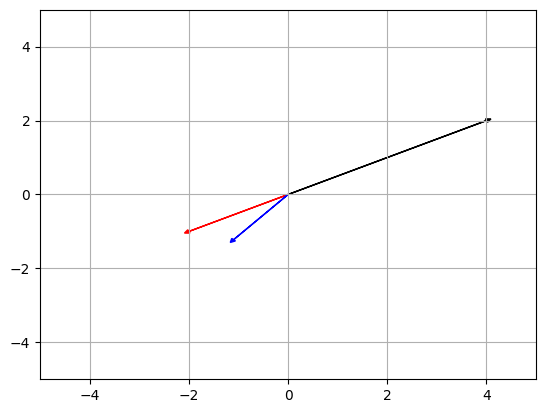

In [ ]:
scalar = -.5
x, y = 4, 2
plt.arrow(0,0,x,y,head_width=0.1, head_length=0.1, fc='k', ec='k')
v1 = scalar*np.array([x,y])
plt.arrow(0,0,v1[0],v1[1],head_width=0.1, head_length=0.1, fc='r', ec='r')

A = np.random.rand(2,2)
print(A)
v2 = A@v1

plt.arrow(0,0,v2[0],v2[1],head_width=0.1, head_length=0.1, fc='b', ec='b')

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

In [10]:
def gauss_jordan(A, b):
    for j in range(A.shape[1]):
        aj = A[j][j]
        for i in range(j + 1 , A.shape[0]):
            ai = A[i][j]
            scalar = - ai/aj
            A[i] = A[i] + (A[j] * scalar)
            b[i] = b[i] + (b[j]*scalar)
            if(i == j + 1):
                aii = A[i][i]
                A[i] = A[i]/aii
                b[i] = b[i]/aii

    x = np.zeros_like(b)
    for i in range(A.shape[0] - 1, -1, -1):
        val = 0
        for j in range(A.shape[1]-1,i - 1,-1):
            if(i == j): continue
            val += (-1* A[i][j])*x[j] 
        val += b[i]
        x[i] = val
    return x
    
  





A = np.array([[1,2,-1],[2,1,1], [3,2,2]])
b = [4, 1, 7]
gauss_jordan(A,b)

array([-5.        ,  6.66666667,  4.33333333])

In [ ]:
X = np.random.randint(0, 55, (6, 6, 2))
for element in X:
    display(sp.Matrix(element))



⎡36  45⎤
⎢      ⎥
⎢53  34⎥
⎢      ⎥
⎢54  49⎥
⎢      ⎥
⎢19  0 ⎥
⎢      ⎥
⎢40  32⎥
⎢      ⎥
⎣45  6 ⎦

⎡39  37⎤
⎢      ⎥
⎢31  19⎥
⎢      ⎥
⎢18  25⎥
⎢      ⎥
⎢2   39⎥
⎢      ⎥
⎢49  42⎥
⎢      ⎥
⎣5   51⎦

⎡39  26⎤
⎢      ⎥
⎢18  23⎥
⎢      ⎥
⎢41  7 ⎥
⎢      ⎥
⎢16  30⎥
⎢      ⎥
⎢42  47⎥
⎢      ⎥
⎣49  0 ⎦

⎡1   45⎤
⎢      ⎥
⎢1   23⎥
⎢      ⎥
⎢10  12⎥
⎢      ⎥
⎢3   48⎥
⎢      ⎥
⎢37  40⎥
⎢      ⎥
⎣0   18⎦

⎡4   16⎤
⎢      ⎥
⎢54  27⎥
⎢      ⎥
⎢53  42⎥
⎢      ⎥
⎢5   26⎥
⎢      ⎥
⎢28  24⎥
⎢      ⎥
⎣32  47⎦

⎡30  30⎤
⎢      ⎥
⎢33  12⎥
⎢      ⎥
⎢52  20⎥
⎢      ⎥
⎢11  15⎥
⎢      ⎥
⎢0   8 ⎥
⎢      ⎥
⎣39  37⎦

In [34]:
print(X[:, :])


[[[36 45]
  [53 34]
  [54 49]
  [19  0]
  [40 32]
  [45  6]]

 [[39 37]
  [31 19]
  [18 25]
  [ 2 39]
  [49 42]
  [ 5 51]]

 [[39 26]
  [18 23]
  [41  7]
  [16 30]
  [42 47]
  [49  0]]

 [[ 1 45]
  [ 1 23]
  [10 12]
  [ 3 48]
  [37 40]
  [ 0 18]]

 [[ 4 16]
  [54 27]
  [53 42]
  [ 5 26]
  [28 24]
  [32 47]]

 [[30 30]
  [33 12]
  [52 20]
  [11 15]
  [ 0  8]
  [39 37]]]


In [39]:
print(X[:, 0:4:2])

[[[36 45]
  [54 49]]

 [[39 37]
  [18 25]]

 [[39 26]
  [41  7]]

 [[ 1 45]
  [10 12]]

 [[ 4 16]
  [53 42]]

 [[30 30]
  [52 20]]]


In [54]:
print(X[0])

print((X[0] * X[1]).ndim, X[0].ndim)
print(X[0].ndim, X[1].ndim)
display(sp.Matrix(np.dot(X[0] , X[1].T)))

[[36 45]
 [53 34]
 [54 49]
 [19  0]
 [40 32]
 [45  6]]
2 2
2 2


⎡3069  1971  1773  1827  3654  2475⎤
⎢                                  ⎥
⎢3325  2289  1804  1432  4025  1999⎥
⎢                                  ⎥
⎢3919  2605  2197  2019  4704  2769⎥
⎢                                  ⎥
⎢741   589   342    38   931    95 ⎥
⎢                                  ⎥
⎢2744  1848  1520  1328  3304  1832⎥
⎢                                  ⎥
⎣1977  1509  960   324   2457  531 ⎦

# Actividad:

1. Construir un programa que permita multiplicar dos matrices

2. Cosntruir un programa que permita construir una regresion lineal simple empleando lo que sigue:

3. Construir un programa que permita calcular una regresion bidimensional y hacer su representación .


Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresion lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial para enoncontrar el conjunto de parametros de la regresión. En este último caso, la regresion lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y y los valos esperados, así, si tenemos una conjunto de datos en N dimensiones la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, tenemos lo siguiente, Supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por:


- Sea $\vec{X}=x^1, x^2, x^3, x^4, ..., x^m$
- Sea $\vec{Y}=y^1, y^2, y^3, y^4, ..., y^m$

Para determinar la ecuacion de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{i} = \theta_1 x^{i} + \theta_0$ la anterior expresion puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{1}\\
y^{2}\\
\vdots\\
y^{m}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{1} & x_1^{2} & \cdots & x_1^{m} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{1} \\
1 & x_1^{2} \\
\vdots & \vdots \\
1 & x_1^{m}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots\\
y^m
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```



4. Construir un programa que permita realizar eliminacion de Gauss- Jordan de una matriz



In [233]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
X = np.c_[ np.ones(len(x1)), x1.T ]


print(X.shape)

display(sp.Matrix(y))
display(sp.Matrix(X))


(10, 2)


⎡-0.796874658443087⎤
⎢                  ⎥
⎢0.333698000578265 ⎥
⎢                  ⎥
⎢ 2.32831559465296 ⎥
⎢                  ⎥
⎢ 2.82549953364675 ⎥
⎢                  ⎥
⎢ 4.39362585468961 ⎥
⎢                  ⎥
⎢ 4.79876904412728 ⎥
⎢                  ⎥
⎢ 5.72957645488244 ⎥
⎢                  ⎥
⎢ 7.99110987586531 ⎥
⎢                  ⎥
⎢ 7.67624719133103 ⎥
⎢                  ⎥
⎣ 9.27877122385564 ⎦

⎡1.0        0.0       ⎤
⎢                     ⎥
⎢1.0  1.11111111111111⎥
⎢                     ⎥
⎢1.0  2.22222222222222⎥
⎢                     ⎥
⎢1.0  3.33333333333333⎥
⎢                     ⎥
⎢1.0  4.44444444444444⎥
⎢                     ⎥
⎢1.0  5.55555555555556⎥
⎢                     ⎥
⎢1.0  6.66666666666667⎥
⎢                     ⎥
⎢1.0  7.77777777777778⎥
⎢                     ⎥
⎢1.0  8.88888888888889⎥
⎢                     ⎥
⎣1.0        10.0      ⎦

In [234]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta = theta.reshape(-1,1)
display(sp.Matrix(theta))




⎡-0.439853533076773⎤
⎢                  ⎥
⎣0.979145468919079 ⎦

In [235]:
Y = X @ theta
display(sp.Matrix(Y).transpose())

[-0.439853533076773  0.648085876833315  1.7360252867434  2.82396469665349  3.9 ↪

↪ 1190410656358  4.99984351647367  6.08778292638375  7.17572233629384  8.26366 ↪

↪ 174620393  9.35160115611402]

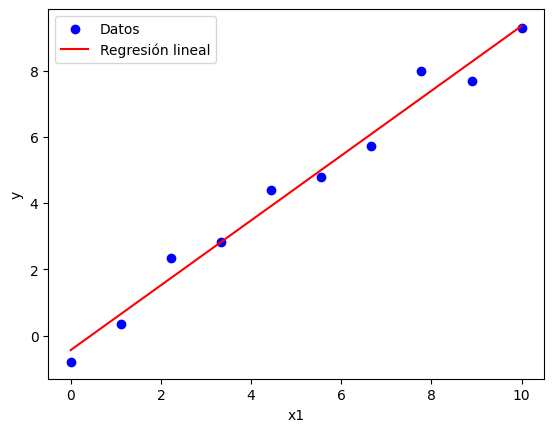

In [ ]:
plt.scatter(x1, y, label="Datos", color="blue")
plt.plot(x1, Y, label="Regresión lineal", color="red")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()



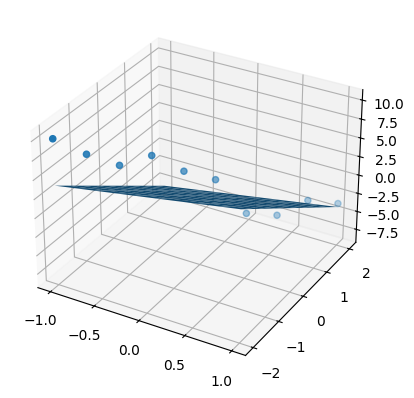

In [89]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2)  + 4*np.random.random(10)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
scatter = ax.scatter(x1, x2, y,"-")

In [90]:
X = np.c_[ np.ones(len(x1)),x1,x2 ]
display(sp.Matrix(X))

⎡1.0         -1.0                -2.0       ⎤
⎢                                           ⎥
⎢1.0  -0.777777777777778  -1.55555555555556 ⎥
⎢                                           ⎥
⎢1.0  -0.555555555555556  -1.11111111111111 ⎥
⎢                                           ⎥
⎢1.0  -0.333333333333333  -0.666666666666667⎥
⎢                                           ⎥
⎢1.0  -0.111111111111111  -0.222222222222222⎥
⎢                                           ⎥
⎢1.0  0.111111111111111   0.222222222222222 ⎥
⎢                                           ⎥
⎢1.0  0.333333333333333   0.666666666666667 ⎥
⎢                                           ⎥
⎢1.0  0.555555555555555    1.11111111111111 ⎥
⎢                                           ⎥
⎢1.0  0.777777777777778    1.55555555555556 ⎥
⎢                                           ⎥
⎣1.0         1.0                 2.0        ⎦

In [91]:
theta = np.linalg.pinv(X.T @ X) @ X.T @ y
theta = theta
display(sp.Matrix(theta))


⎡2.18622696101996⎤
⎢                ⎥
⎢-1.4720739907262⎥
⎢                ⎥
⎣-2.9441479814524⎦

In [92]:
X1, X2 = np.meshgrid(x1, x2)  # Crear una malla
Y_pred = theta[0] + theta[1] * X1 + theta[2] * X2 

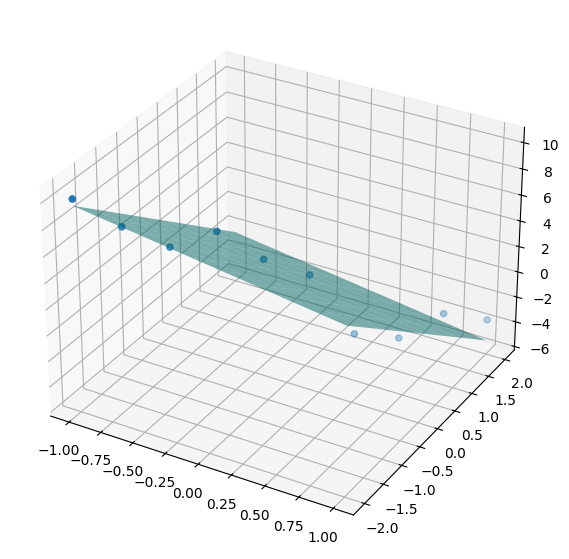

In [93]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Y_pred, alpha=0.5, color='cyan')

ax.scatter(x1,x2,y)




3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br>
a) Diagonalize $A$.<br>




In [242]:
x, y, z = sp.symbols("x,y,z")

# A = sp.Matrix([[2, -1, 1], [0, 3, -1],[2, 1, 3]])
A = sp.Matrix([[2,-1],
              [1,4]])
r = sp.Matrix([x,y])
display(r)
display(A)
r_prima = A@r
r_prima

⎡x⎤
⎢ ⎥
⎣y⎦

⎡2  -1⎤
⎢     ⎥
⎣1  4 ⎦

⎡2⋅x - y⎤
⎢       ⎥
⎣x + 4⋅y⎦

In [226]:
ld = sp.Symbol('λ')
I = sp.eye(2)

print(A.det())
print(A.is_diagonalizable())
M = A - ld*I
M

-4
True


⎡-λ - 2    2   ⎤
⎢              ⎥
⎣  3     -λ - 1⎦

In [245]:
det = sp.det(M)
display(det)
eigenvalues = A.eigenvals()
eigenvectors = A.eigenvects()
display( eigenvectors[0][2][0] )

display( eigenvectors[1][2][0] )
print(eigenvalues, eigenvectors)

⎡-1⎤
⎢  ⎥
⎣1 ⎦

IndexError: list index out of range

In [246]:
r0 = np.array([500, 100])
t=sp.Symbol('t')

C, D = A.jordan_form()
display(J)
display(P)

# C, D = A.diagonalize()

D_exp = (D*t).exp()

A_exp_jordan = C @ D_exp@ C.inv()

r_t_jordan = A_exp_jordan @ r0

display(sp.Matrix(r_t_jordan))


⎡1/2  -1⎤
⎢       ⎥
⎣ 1   1 ⎦

⎡1  0⎤
⎢    ⎥
⎣0  4⎦

⎡         3⋅t        3⋅t⎤
⎢- 600⋅t⋅ℯ    + 500⋅ℯ   ⎥
⎢                       ⎥
⎢        3⋅t        3⋅t ⎥
⎣ 600⋅t⋅ℯ    + 100⋅ℯ    ⎦